# Series Temporales - Evolución IPI

## Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error


from sklearn.linear_model import LinearRegression 

from statsmodels.tsa.statespace.sarimax import SARIMAX


import warnings
warnings.filterwarnings("ignore")

In [2]:
df_=pd.read_excel('./IPI.xlsx')
df_.columns=['Fecha', 'IPI']
df_.sort_values(by='Fecha', ascending=True, inplace=False)
df_

,Fecha,IPI
0,2024-01-01,101.916
1,2023-12-01,89.369
2,2023-11-01,107.853
3,2023-10-01,104.011
4,2023-09-01,103.002
...,...,...
584,1975-05-01,72.031
585,1975-04-01,72.647
586,1975-03-01,73.509
587,1975-02-01,70.061


#### Preparación de datos

##### Creamos Lags de la variable a predecir - Serán los regresores

In [3]:
df_['IPI_t-1']=df_['IPI'].shift(-1)
df_['IPI_t-2']=df_['IPI'].shift(-2)
df_['IPI_t-3']=df_['IPI'].shift(-3)
df_['IPI_t-4']=df_['IPI'].shift(-4)
df_['IPI_t-5']=df_['IPI'].shift(-5)
df_['IPI_t-6']=df_['IPI'].shift(-6)
df_['IPI_t-7']=df_['IPI'].shift(-7)
df_['IPI_t-8']=df_['IPI'].shift(-8)
df_['IPI_t-9']=df_['IPI'].shift(-9)
df_['IPI_t-10']=df_['IPI'].shift(-10)
df_['IPI_t-11']=df_['IPI'].shift(-11)
df_['IPI_t-12']=df_['IPI'].shift(-12)
df=df_.copy()
df.head(15)

,Fecha,IPI,IPI_t-1,IPI_t-2,IPI_t-3,IPI_t-4,IPI_t-5,IPI_t-6,IPI_t-7,IPI_t-8,IPI_t-9,IPI_t-10,IPI_t-11,IPI_t-12
0,2024-01-01,101.916,89.369,107.853,104.011,103.002,81.697,103.353,107.155,108.623,93.806,114.462,100.708,98.409
1,2023-12-01,89.369,107.853,104.011,103.002,81.697,103.353,107.155,108.623,93.806,114.462,100.708,98.409,93.935
2,2023-11-01,107.853,104.011,103.002,81.697,103.353,107.155,108.623,93.806,114.462,100.708,98.409,93.935,107.529
3,2023-10-01,104.011,103.002,81.697,103.353,107.155,108.623,93.806,114.462,100.708,98.409,93.935,107.529,103.381
4,2023-09-01,103.002,81.697,103.353,107.155,108.623,93.806,114.462,100.708,98.409,93.935,107.529,103.381,108.193
5,2023-08-01,81.697,103.353,107.155,108.623,93.806,114.462,100.708,98.409,93.935,107.529,103.381,108.193,85.644
6,2023-07-01,103.353,107.155,108.623,93.806,114.462,100.708,98.409,93.935,107.529,103.381,108.193,85.644,105.956
7,2023-06-01,107.155,108.623,93.806,114.462,100.708,98.409,93.935,107.529,103.381,108.193,85.644,105.956,109.605
8,2023-05-01,108.623,93.806,114.462,100.708,98.409,93.935,107.529,103.381,108.193,85.644,105.956,109.605,109.507
9,2023-04-01,93.806,114.462,100.708,98.409,93.935,107.529,103.381,108.193,85.644,105.956,109.605,109.507,98.831


### Regresión Lineal Múltiple - SSTT

In [4]:
# DATOS
df=df[df['Fecha']>='01-1990']
x = pd.DataFrame(df[['IPI_t-1', 'IPI_t-12']])
y = pd.DataFrame(df['IPI'])

# Instanciamos y ajustamos el modelo de regresión lineal
model = LinearRegression(fit_intercept=False) 
model.fit(x, y)

print('COEFICIENTES:',model.coef_)
print('INTERCEPTO:',model.intercept_)


#Predecimos
y_pred=model.predict(x)


#Medimos el error
print('MAE:',mean_absolute_error(y, y_pred))


df_errores=pd.DataFrame()
df_errores['Fecha']=df['Fecha']
df_errores['Real']=y
df_errores['Predicho']=y_pred
df_errores['Error']=df_errores['Real']-df_errores['Predicho']

COEFICIENTES: [[0.14486101 0.8552544 ]]
INTERCEPTO: 0.0
MAE: 5.111427233677905


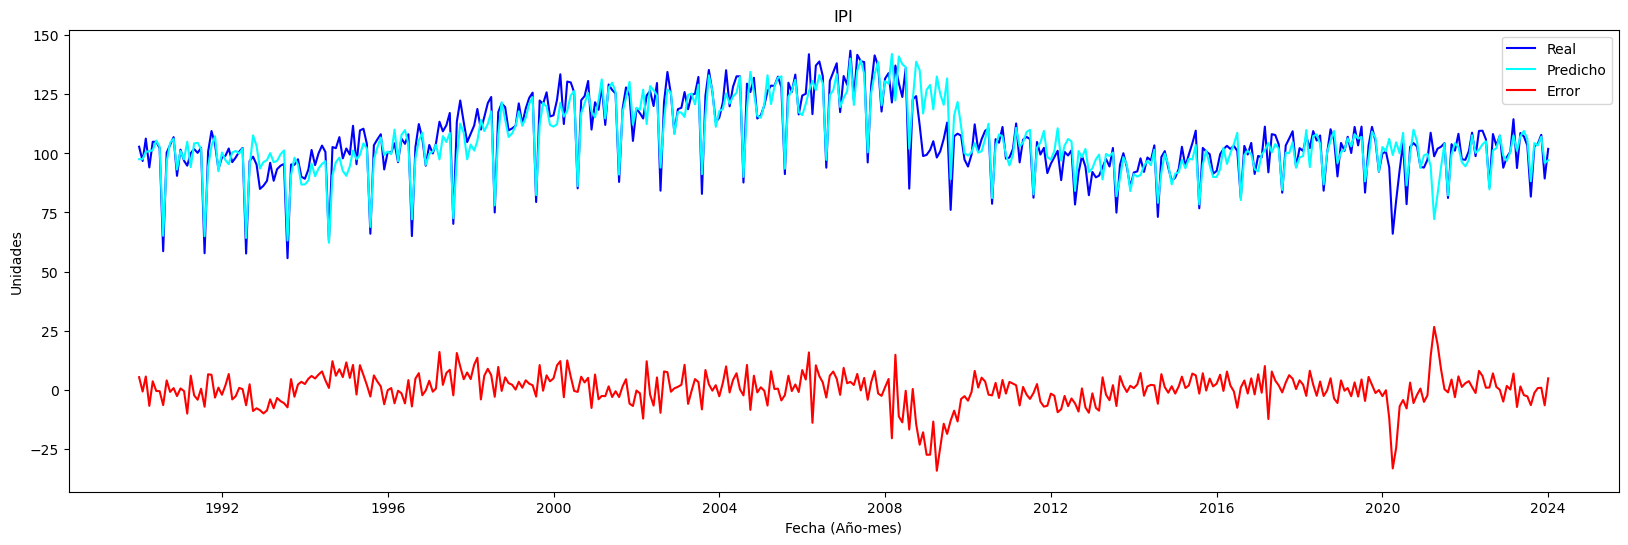

In [7]:
plt.figure(figsize=(20, 6))
plt.plot(df_errores['Fecha'], df_errores['Real'], color='blue', label='Real')
plt.plot(df_errores['Fecha'], df_errores['Predicho'], color='cyan', label='Predicho')
plt.plot(df_errores['Fecha'], df_errores['Error'], color='red', label='Error')


plt.xlabel('Fecha (Año-mes)')
plt.ylabel('Unidades')
plt.title('IPI')
plt.legend()

plt.show()

###### Predicción para enero - automática y manual

In [25]:
df_enero=df_[df_['Fecha']=='2024-01']
y_pred_enero=model.predict(df_enero[['IPI_t-1', 'IPI_t-12']])
y_pred_enero

array([[97.11081459]])

In [26]:
model.coef_[0,0]*df_enero['IPI_t-1']+model.coef_[0,1]*df_enero['IPI_t-12']

0    97.110815
dtype: float64

###### Predicción para febrero - automática y manual

In [27]:
df_feb=df_[df_['Fecha']=='2024-01']
x_feb=df_feb[['IPI', 'IPI_t-11']].rename(columns={'IPI':'IPI_t-1', 'IPI_t-11':'IPI_t-12'})
y_pred_febrero=model.predict(x_feb)
y_pred_febrero

array([[100.89461561]])

In [28]:
df_errores

,Fecha,Real,Predicho,Error
0,2024-01-01,101.916,97.110815,4.805185
1,2023-12-01,89.369,95.962017,-6.593017
2,2023-11-01,107.853,107.031790,0.821210
3,2023-10-01,104.011,103.338030,0.672970
4,2023-09-01,103.002,104.367250,-1.365250
...,...,...,...,...
404,1990-05-01,104.907,101.349099,3.557901
405,1990-04-01,94.072,100.903267,-6.831267
406,1990-03-01,106.262,100.687709,5.574291
407,1990-02-01,96.780,97.560065,-0.780065


### SARIMAX - SSTT

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# DATOS
df_s=df.copy()
df_s.sort_values(by='Fecha', ascending=True, inplace=True)
y = df_s['IPI']

# Ajustamos el modelo SARIMAX
order = ([1,12], 0, 0)
model = SARIMAX(y, order=order)
results = model.fit()

# Predecimos
start = 0
end = len(df) - 1
y_pred_sarimax = results.predict(start=start, end=end, dynamic=False)


print(results.params)

print(results.summary())

df_errores_s=pd.DataFrame()
df_errores_s['Fecha']=df['Fecha']#list(df['Fecha'].sort_values(ascending=True))#df['Fecha']
df_errores_s['Fecha_2']=df['Fecha']
df_errores_s['Real']=y
df_errores_s['Predicho']=y_pred_sarimax
df_errores_s['Error']=df_errores_s['Real']-df_errores_s['Predicho']

ar.L1      0.147533
ar.L12     0.852203
sigma2    52.000073
dtype: float64
                                 SARIMAX Results                                  
Dep. Variable:                        IPI   No. Observations:                  409
Model:             SARIMAX([1, 12], 0, 0)   Log Likelihood               -1400.317
Date:                    Tue, 19 Mar 2024   AIC                           2806.635
Time:                            14:42:49   BIC                           2818.676
Sample:                                 0   HQIC                          2811.399
                                    - 409                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1475      0.017      8.437      0.000       0.113       0.182
ar.L12         0.8522   

In [31]:
df_pred_manual=df_errores_s.copy()
df_pred_manual['Real-1']=df_pred_manual['Real'].shift(-1)
df_pred_manual['Real-12']=df_pred_manual['Real'].shift(-12)
df_pred_manual['Pred_Manual']=df_pred_manual['Real-1']*results.params[0]+df_pred_manual['Real-12']*results.params[1]
df_pred_manual.sort_values(by='Fecha', ascending=False, inplace=True)
df_pred_manual

,Fecha,Fecha_2,Real,Predicho,Error,Real-1,Real-12,Pred_Manual
0,2024-01-01,2024-01-01,101.916,97.049236,4.866764,89.369,98.409,97.049236
1,2023-12-01,2023-12-01,89.369,95.963475,-6.594475,107.853,93.935,95.963475
2,2023-11-01,2023-11-01,107.853,106.981495,0.871505,104.011,107.529,106.981495
3,2023-10-01,2023-10-01,104.011,103.297699,0.713301,103.002,103.381,103.297699
4,2023-09-01,2023-09-01,103.002,104.255315,-1.253315,81.697,108.193,104.255315
...,...,...,...,...,...,...,...,...
404,1990-05-01,1990-05-01,104.907,93.836345,11.070655,94.072,NaN,NaN
405,1990-04-01,1990-04-01,94.072,104.490253,-10.418253,106.262,NaN,NaN
406,1990-03-01,1990-03-01,106.262,95.830913,10.431087,96.780,NaN,NaN
407,1990-02-01,1990-02-01,96.780,101.124662,-4.344662,102.814,NaN,NaN


Observación: Los coefcientes obtenidos con la regresión lineal y los obtenidos con el SARIMAX son los mismos

Conclusión: Sarimax es una regresión en la que las variables explicativas son los lags de la variable a predecir

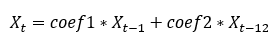

### Regresión Lineal Múltiple Con intercepto - SSTT 

In [12]:
# DATOS
df=df[df['Fecha']>='01-1990']
x = pd.DataFrame(df[['IPI_t-1', 'IPI_t-12']])
y = pd.DataFrame(df['IPI'])

# Instanciamos y ajustamos el modelo de regresión lineal
model = LinearRegression(fit_intercept=True) 
model.fit(x, y)

print('COEFICIENTES:',model.coef_)
print('INTERCEPTO:',model.intercept_)


#Predecimos
y_pred=model.predict(x)


#Medimos el error
print('MAE:',mean_absolute_error(y, y_pred))


df_errores=pd.DataFrame()
df_errores['Fecha']=df['Fecha']
df_errores['Real']=y
df_errores['Predicho']=y_pred
df_errores['Error']=df_errores['Real']-df_errores['Predicho']

COEFICIENTES: [[0.11860702 0.82961374]]
INTERCEPTO: [5.57561264]
MAE: 5.0978627030254895


###### Predicción para enero - automática y manual

In [13]:
df_enero=df_[df_['Fecha']=='2024-01']
y_pred_enero=model.predict(df_enero[['IPI_t-1', 'IPI_t-12']])
y_pred_enero

array([[97.81686137]])

In [14]:
model.intercept_+model.coef_[0,0]*df_enero['IPI_t-1']+model.coef_[0,1]*df_enero['IPI_t-12']

0    97.816861
dtype: float64

### SARIMAX Con tendencia - SSTT 

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# DATOS
df_s=df.copy()
df_s.sort_values(by='Fecha', ascending=True, inplace=True)
y = df_s['IPI']

# Ajustamos el modelo SARIMAX
order = ([1,12], 0, 0)
model = SARIMAX(y, order=order, trend='c')
results = model.fit()

# Predecimos
start = 0
end = len(df) - 1
y_pred_sarimax = results.predict(start=start, end=end,dynamic=False)


print(results.params)

print(results.summary())

df_errores_s=pd.DataFrame()
df_errores_s['Fecha']=df['Fecha']#list(df['Fecha'].sort_values(ascending=True))#df['Fecha']
df_errores_s['Fecha_2']=df['Fecha']
df_errores_s['Real']=y
df_errores_s['Predicho']=y_pred_sarimax
df_errores_s['Error']=df_errores_s['Real']-df_errores_s['Predicho']

intercept     5.922183
ar.L1         0.115268
ar.L12        0.827208
sigma2       51.672252
dtype: float64
                                 SARIMAX Results                                  
Dep. Variable:                        IPI   No. Observations:                  409
Model:             SARIMAX([1, 12], 0, 0)   Log Likelihood               -1394.703
Date:                    Tue, 19 Mar 2024   AIC                           2797.407
Time:                            14:45:46   BIC                           2813.462
Sample:                                 0   HQIC                          2803.759
                                    - 409                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.9222      2.163      2.738      0.006       1.682     

In [38]:
df_pred_manual=df_errores_s.copy()
df_pred_manual['Real-1']=df_pred_manual['Real'].shift(-1)
df_pred_manual['Real-12']=df_pred_manual['Real'].shift(-12)
df_pred_manual['Pred_Manual']=results.params[0]+df_pred_manual['Real-1']*results.params[1]+df_pred_manual['Real-12']*results.params[2]
df_pred_manual.sort_values(by='Fecha', ascending=False, inplace=True)
df_pred_manual

,Fecha,Fecha_2,Real,Predicho,Error,Real-1,Real-12,Pred_Manual
0,2024-01-01,2024-01-01,101.916,97.628256,4.287744,89.369,98.409,97.628256
1,2023-12-01,2023-12-01,89.369,96.057935,-6.688935,107.853,93.935,96.057935
2,2023-11-01,2023-11-01,107.853,106.860143,0.992857,104.011,107.529,106.860143
3,2023-10-01,2023-10-01,104.011,103.312579,0.698421,103.002,103.381,103.312579
4,2023-09-01,2023-09-01,103.002,104.837326,-1.835326,81.697,108.193,104.837326
...,...,...,...,...,...,...,...,...
404,1990-05-01,1990-05-01,104.907,99.320053,5.586947,94.072,NaN,NaN
405,1990-04-01,1990-04-01,94.072,104.304937,-10.232937,106.262,NaN,NaN
406,1990-03-01,1990-03-01,106.262,100.427494,5.834506,96.780,NaN,NaN
407,1990-02-01,1990-02-01,96.780,102.894977,-6.114977,102.814,NaN,NaN
